# Importing the libraries 

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import matplotlib.pyplot as plt

# Importing the Dataset And Data Exploration 

In [3]:
df = pd.read_csv('TSLA.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [6]:
#investigate which column has missing value
nulls = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False).to_frame().rename(columns={0: "MissingVals"})
nulls["MissingValsPct"] = nulls["MissingVals"] / len(df)
nulls

,MissingVals,MissingValsPct


# Data Preparation

In [7]:
0.8*2416

1932.8000000000002

In [8]:
0.2*2416

483.20000000000005

In [9]:
train = df[:1933]

In [10]:
train 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
1928,2018-02-26,353.500000,359.000000,352.359985,357.420013,357.420013,4340000
1929,2018-02-27,356.250000,359.989990,350.010010,350.989990,350.989990,4797400
1930,2018-02-28,352.570007,355.239990,342.220001,343.059998,343.059998,6069700
1931,2018-03-01,345.010010,348.670013,330.070007,330.929993,330.929993,6885600


In [11]:
test = df[1933:]

In [12]:
test

,Date,Open,High,Low,Close,Adj Close,Volume
1933,2018-03-05,332.390015,337.750000,329.290009,333.350006,333.350006,3823800
1934,2018-03-06,333.750000,336.369995,327.029999,328.200012,328.200012,4285700
1935,2018-03-07,325.440002,332.500000,321.739990,332.299988,332.299988,5007300
1936,2018-03-08,332.859985,333.299988,326.269989,329.100006,329.100006,3566200
1937,2018-03-09,324.100006,328.489990,322.369995,327.170013,327.170013,5506800
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [13]:
type(train)

pandas.core.frame.DataFrame

In [14]:
train = train.iloc[:,1:2].values

In [15]:
train

array([[ 19.      ],
       [ 25.790001],
       [ 25.      ],
       ...,
       [352.570007],
       [345.01001 ],
       [326.980011]])

In [16]:
type(train)

numpy.ndarray

In [17]:
test = test.iloc[:,1:2].values

In [18]:
test

array([[332.390015],
       [333.75    ],
       [325.440002],
       [332.859985],
       [324.100006],
       [328.609985],
       [328.609985],
       [336.76001 ],
       [329.380005],
       [322.929993],
       [316.5     ],
       [314.869995],
       [310.25    ],
       [313.890015],
       [311.25    ],
       [307.339996],
       [304.      ],
       [264.579987],
       [256.48999 ],
       [256.26001 ],
       [269.820007],
       [252.779999],
       [289.339996],
       [301.      ],
       [300.369995],
       [298.970001],
       [300.73999 ],
       [302.320007],
       [303.600006],
       [299.      ],
       [288.869995],
       [291.079987],
       [291.079987],
       [295.170013],
       [291.290009],
       [285.      ],
       [283.5     ],
       [278.75    ],
       [285.369995],
       [293.609985],
       [293.51001 ],
       [298.570007],
       [278.790009],
       [283.      ],
       [297.5     ],
       [300.799988],
       [300.410004],
       [307.5

In [19]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train)

In [20]:
training_set_scaled

array([[0.00771826],
       [0.02604237],
       [0.02391041],
       ...,
       [0.90792067],
       [0.88751858],
       [0.83886118]])

In [21]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
test_set_scaled = sc.fit_transform(test)

In [22]:
training_set_scaled.shape

(1933, 1)

In [23]:
test_set_scaled.shape

(483, 1)

# Building the Time Stamp


The specified number of time steps defines the number of input variables (X) used to predict the next time step (y). As such, for each time step used in the representation, that many rows must be removed from the beginning of the dataset. This is because there are no prior observations to use as time steps for the first values in the dataset.

# Time Stamp for 1 Month

In [25]:
# Creating a data structure with 20 (working days in 1 month) timesteps and 1 output
X_train1 = []
y_train1 = []
for i in range(20, 1933):
    X_train1.append(training_set_scaled[i-20:i, 0])
    y_train1.append(training_set_scaled[i, 0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)

In [26]:
X_test1 = []
y_test1 = []
for i in range(20, 483):
    X_test1.append(test_set_scaled[i-20:i, 0])
    y_test1.append(test_set_scaled[i, 0])
X_test1, y_test1 = np.array(X_test1), np.array(y_test1)

In [27]:
test.shape

(483, 1)

In [28]:
# Reshaping 1 month 
X_train1_reshaped = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))

# Time Stamp for 3 months

In [29]:
# Creating a data structure with 60 (working days in 3 months) timesteps and 1 output
X_train3 = []
y_train3 = []
for i in range(60, 1933):
    X_train3.append(training_set_scaled[i-60:i, 0])
    y_train3.append(training_set_scaled[i, 0])
X_train3, y_train3 = np.array(X_train3), np.array(y_train3)

In [30]:
X_test3 = []
y_test3 = []
for i in range(60, 483):
    X_test3.append(test_set_scaled[i-60:i, 0])
    y_test3.append(test_set_scaled[i, 0])
X_test3, y_test3 = np.array(X_test3), np.array(y_test3)

In [31]:
X_test3.shape

(423, 60)

In [32]:
# Reshaping 3 month 
X_train3_reshaped = np.reshape(X_train3, (X_train3.shape[0], X_train3.shape[1], 1))

# BUILDING THE MODEL

# Importing Deep Learning models

In [33]:
import tensorflow as tf 

In [34]:
import keras

Using TensorFlow backend.


In [35]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Building the LSTM using the first month 

In [36]:
# Initialising the RNN
regressor = Sequential()

In [37]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train1_reshaped.shape[1], 1)))
regressor.add(Dropout(0.2))

In [38]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [39]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [40]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [41]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [42]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [43]:
# Fitting the RNN to the Training set
regressor.fit(X_train1_reshaped, y_train1, epochs = 100, batch_size = 32)

Epoch 1/100
1913/1913 [==============================] - 33s 17ms/step - loss: 0.0276
Epoch 2/100
1913/1913 [==============================] - 17s 9ms/step - loss: 0.0049
Epoch 3/100
1913/1913 [==============================] - 17s 9ms/step - loss: 0.0040
Epoch 4/100
1913/1913 [==============================] - 17s 9ms/step - loss: 0.0037
Epoch 5/100
1913/1913 [==============================] - 20s 10ms/step - loss: 0.0038
Epoch 6/100
1913/1913 [==============================] - 20s 10ms/step - loss: 0.0036
Epoch 7/100
1913/1913 [==============================] - 20s 10ms/step - loss: 0.0035
Epoch 8/100
1913/1913 [==============================] - 25s 13ms/step - loss: 0.0031
Epoch 9/100
1913/1913 [==============================] - 18s 10ms/step - loss: 0.0031
Epoch 10/100
1913/1913 [==============================] - 17s 9ms/step - loss: 0.0031
Epoch 11/100
1913/1913 [==============================] - 16s 9ms/step - loss: 0.0031
Epoch 12/100
1913/1913 [==============================] -

# Building the LSTM using 3 month

In [44]:
# Initialising the RNN
regressor3 = Sequential()

In [45]:
# Adding the first LSTM layer and some Dropout regularisation
regressor3.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train3_reshaped.shape[1], 1)))
regressor3.add(Dropout(0.2))

In [46]:
# Adding a second LSTM layer and some Dropout regularisation
regressor3.add(LSTM(units = 50, return_sequences = True))
regressor3.add(Dropout(0.2))

In [47]:
# Adding a third LSTM layer and some Dropout regularisation
regressor3.add(LSTM(units = 50, return_sequences = True))
regressor3.add(Dropout(0.2))

In [48]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor3.add(LSTM(units = 50))
regressor3.add(Dropout(0.2))

In [49]:
# Adding the output layer
regressor3.add(Dense(units = 1))

In [50]:
# Compiling the RNN
regressor3.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [51]:
# Fitting the RNN to the Training set
regressor3.fit(X_train3_reshaped, y_train3, epochs = 100, batch_size = 32)

Epoch 1/100
1873/1873 [==============================] - 48s 26ms/step - loss: 0.0212
Epoch 2/100
1873/1873 [==============================] - 38s 20ms/step - loss: 0.0053
Epoch 3/100
1873/1873 [==============================] - 40s 21ms/step - loss: 0.0047
Epoch 4/100
1873/1873 [==============================] - 48s 26ms/step - loss: 0.0042
Epoch 5/100
1873/1873 [==============================] - 52s 28ms/step - loss: 0.0038
Epoch 6/100
1873/1873 [==============================] - 64s 34ms/step - loss: 0.0040
Epoch 7/100
1873/1873 [==============================] - 46s 25ms/step - loss: 0.0037
Epoch 8/100
1873/1873 [==============================] - 34s 18ms/step - loss: 0.0034
Epoch 9/100
1873/1873 [==============================] - 38s 20ms/step - loss: 0.0035
Epoch 10/100
1873/1873 [==============================] - 35s 19ms/step - loss: 0.0036
Epoch 11/100
1873/1873 [==============================] - 32s 17ms/step - loss: 0.0031
Epoch 12/100
1873/1873 [============================

# Data Preparation for the test 

In [52]:
df = df['Open']

In [53]:
df

0        19.000000
1        25.790001
2        25.000000
3        23.000000
4        20.000000
           ...    
2411    568.489990
2412    575.690002
2413    632.419983
2414    640.000000
2415    673.690002
Name: Open, Length: 2416, dtype: float64

# Making the predictions and visualising the results

# Using One Month 

In [54]:
inputs1 = df[len(df) - len(test) - 20:].values
inputs1 = inputs1.reshape(-1,1)
inputs1 = sc.transform(inputs1)

In [62]:
X_test1_reshaped = []
for i in range(20, 503):
    X_test1_reshaped.append(inputs1[i-20:i, 0])
X_test1_reshaped = np.array(X_test1_reshaped)
X_test1_reshaped = np.reshape(X_test1_reshaped, (X_test1_reshaped.shape[0], X_test1_reshaped.shape[1], 1))
predicted_stock_price1 = regressor.predict(X_test1_reshaped)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)

# Using 3 Months

In [63]:
inputs3 = df[len(df) - len(test) - 60:].values
inputs3 = inputs3.reshape(-1,1)
inputs3 = sc.transform(inputs3)

In [64]:
X_test3_reshaped = []
for i in range(60, 543):
    X_test3_reshaped.append(inputs3[i-60:i, 0])
X_test3_reshaped = np.array(X_test3_reshaped)
X_test3_reshaped = np.reshape(X_test3_reshaped, (X_test3_reshaped.shape[0], X_test3.shape[1], 1))
predicted_stock_price3 = regressor3.predict(X_test3_reshaped)
predicted_stock_price3 = sc.inverse_transform(predicted_stock_price3)

# Visualization 

In [65]:
import matplotlib.pyplot as plt

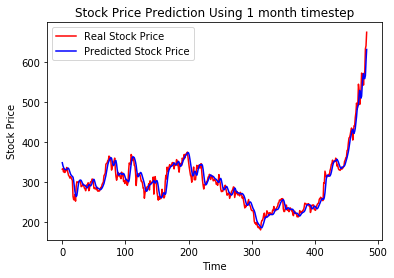

<Figure size 720x360 with 0 Axes>

In [94]:
plt.plot(test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price1, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction Using 1 month timestep')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.figure(figsize=(10,5))
plt.show()

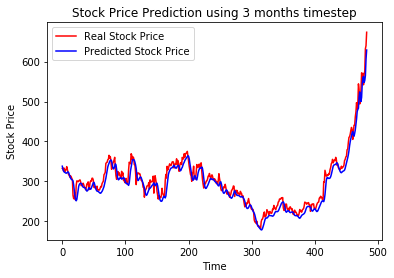

In [93]:
plt.plot(test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price3, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction using 3 months timestep')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Evaluation

# 1 month 

In [71]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',mean_squared_error(test, predicted_stock_price1))

Mean Squared Error: 235.77204239309813


In [73]:
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(test, predicted_stock_price1)))

Root Mean Squared Error: 15.354870315085638


# 3 Months

In [74]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',mean_squared_error(test, predicted_stock_price3))

Mean Squared Error: 301.3711345567097


In [75]:
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(test, predicted_stock_price3)))

Root Mean Squared Error: 17.360044198005653


# Using SVM 

# The first Month 

In [76]:
#SVR
from sklearn.svm import SVR
SVR = SVR(kernel = 'rbf')
SVR.fit(X_train1,y_train1)
y_pred_svm_scaled1 = SVR.predict(X_test1)

In [77]:
y_pred_svm=y_pred_svm_scaled1.reshape(-1,1)

y_pred_svm1 = sc.inverse_transform(y_pred_svm)

In [78]:
test.shape

(483, 1)

In [79]:
y_pred_svm1.shape

(463, 1)

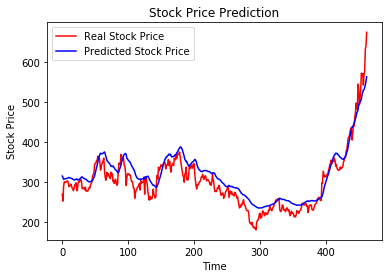

In [80]:
plt.plot(test[20:], color = 'red', label = 'Real Stock Price')
plt.plot(y_pred_svm1, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Using 3 months 

In [81]:
#SVR
from sklearn.svm import SVR
SVR = SVR(kernel = 'rbf')
SVR.fit(X_train3,y_train3)
y_pred_svm_scaled3 = SVR.predict(X_test3)

In [82]:
X_test3.shape

(423, 60)

In [83]:
y_pred_svm_scaled3.shape

(423,)

In [84]:
y_pred_svm3=y_pred_svm_scaled3.reshape(-1,1)

y_pred_svm3 = sc.inverse_transform(y_pred_svm3)

In [85]:
y_pred_svm3.shape

(423, 1)

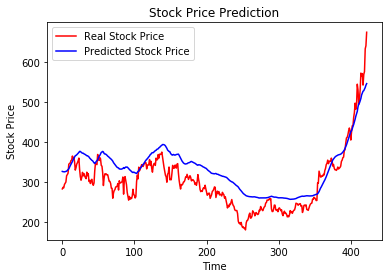

In [86]:
plt.plot(test[60:], color = 'red', label = 'Real Stock Price')
plt.plot(y_pred_svm3, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Evaluation 

# 1 Month 

In [90]:
print('Mean Squared Error:',mean_squared_error(test[20:], y_pred_svm1))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(test[20:], y_pred_svm1)))

Mean Squared Error: 764.8711698331672
Root Mean Squared Error: 27.656304341563196


# 3 Months

In [91]:
print('Mean Squared Error:',mean_squared_error(test[60:], y_pred_svm3))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(test[60:], y_pred_svm3)))

Mean Squared Error: 1884.205862345076
Root Mean Squared Error: 43.40744017268325
